### Классификация VPN-трафика путем использования классических методов машинного обучения

In [96]:
# Объявляю нужные библиотеки
import pandas as pd # Библиотека для работы с фреймворками
import matplotlib.pyplot as plt # Библиотека для визуализации данных
import seaborn as sns # Библиотека для визуализации данных
import numpy as np # Библиотека для математических операций
from sklearn.preprocessing import LabelEncoder # Инструмент разметки текстовых данных в таблице
from sklearn.model_selection import train_test_split # Инструмент разбивки на тренировочную и тестовую выборки
from sklearn.metrics import confusion_matrix # Матрица ошибок
from sklearn.neighbors import KNeighborsClassifier # Метод KNN

In [97]:
# Загрузка датасета из csv-файла
df = pd.read_csv('vpnDataset.csv', sep=',')
df.head()

,Version,Protocol,TTL,SrcAddress,DestAddress,SrcPort,DestPort,SeqNum,AckNum,Flag,DataSize,Service,Label
0,4,6,236,143.204.73.4,10.19.0.35,443,38334,2781011508,1856855387,SYN-ACK,0,HTTPS,1
1,4,6,229,34.215.209.228,10.19.0.35,443,36674,2683269580,686503037,SYN-ACK,0,HTTPS,1
2,4,6,236,143.204.73.4,10.19.0.35,443,38334,2781011509,1856855904,ACK,0,HTTPS,1
3,4,6,236,143.204.73.4,10.19.0.35,443,38334,2781011509,1856855904,ACK,1313,HTTPS,1
4,4,6,236,143.204.73.4,10.19.0.35,443,38334,2781012822,1856855904,PSH-ACK,1313,HTTPS,1


In [98]:
# Информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40289 entries, 0 to 40288
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Version      40289 non-null  int64 
 1   Protocol     40289 non-null  int64 
 2   TTL          40289 non-null  int64 
 3   SrcAddress   40289 non-null  object
 4   DestAddress  40289 non-null  object
 5   SrcPort      40289 non-null  int64 
 6   DestPort     40289 non-null  int64 
 7   SeqNum       40289 non-null  int64 
 8   AckNum       40289 non-null  int64 
 9   Flag         40289 non-null  object
 10  DataSize     40289 non-null  int64 
 11  Service      40289 non-null  object
 12  Label        40289 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 4.0+ MB


### Предобработка табличных данных

In [99]:
# Разметка ряда столбцов
le = LabelEncoder()
df['SrcAddress'] = le.fit_transform(df['SrcAddress'])
df['DestAddress'] = le.fit_transform(df['DestAddress'])
df['Flag'] = le.fit_transform(df['Flag'])
df['Service'] = le.fit_transform(df['Service'])
df.head()

,Version,Protocol,TTL,SrcAddress,DestAddress,SrcPort,DestPort,SeqNum,AckNum,Flag,DataSize,Service,Label
0,4,6,236,56,0,443,38334,2781011508,1856855387,4,0,1,1
1,4,6,229,132,0,443,36674,2683269580,686503037,4,0,1,1
2,4,6,236,56,0,443,38334,2781011509,1856855904,0,0,1,1
3,4,6,236,56,0,443,38334,2781011509,1856855904,0,1313,1,1
4,4,6,236,56,0,443,38334,2781012822,1856855904,3,1313,1,1


In [100]:
# Разбиение таблицы на матрицу признаков и объектов
X_data = df.iloc[:,:-1].to_numpy() # массив признаков
Y_data = df['Label'].to_numpy() # массив объектов

In [101]:
# Разбиение на тренировочную и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, train_size=0.77, shuffle=True, random_state=18)

### Обучение и проверка моделей на основе LogisticRegression, KNN, RandomForestTree и XGBoost

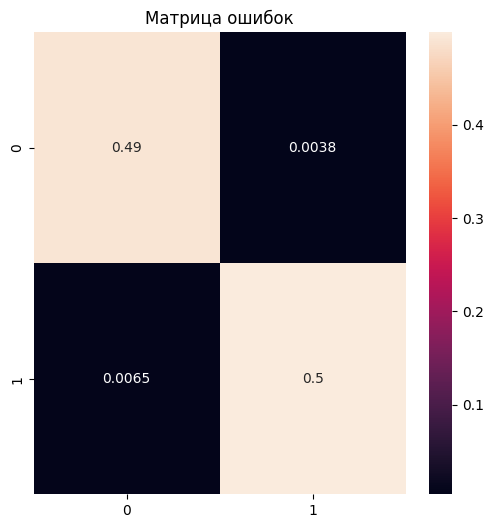

In [102]:
# Обучение и проверка модели на основе KNN
model_KNN = KNeighborsClassifier(n_neighbors=10**1) # инициализация модели на основе KNN
model_KNN.fit(X_train,Y_train)
Y_pred = model_KNN.predict(X_test)
cm_model_KNN = confusion_matrix(Y_test,Y_pred, normalize='all')
#
#Визуализация матрицы ошибок
plt.figure(figsize=(6,6))
sns.heatmap(cm_model_KNN, annot=True)
plt.title('Матрица ошибок')
plt.show()